In [1]:
import csv
import pandas as pd
from utils.user_group import Mobile, Stationary
import matplotlib.pyplot as plt
import numpy as np 

mobile_users = Mobile()
stationary_users = Stationary()

# A Stationnary vs Mobile Eye Trackers Comparison for Real-World Human-Robot Collaborative Assembly Tasks

## I- Participants

Blablabla les utilisateurs

### I.1 - Participants Wearing glasses/contact lenses

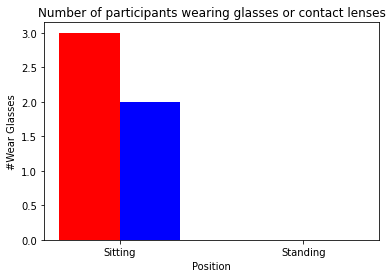

In [2]:
sitting = [0,0]
standing = [0,0]

for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(user.is_wearing_glasses()):
        if(user.position == 'sitting'):
            sitting[0] += 1
        else:
            standing[0] += 1

for id in stationary_users.get_id_list():
    user = stationary_users.get_user(id)
    if(user.is_wearing_glasses()):
        if(user.position == 'sitting'):
            sitting[1] += 1
        else:
            standing[1] += 1

fig, ax = plt.subplots()
lab = ["Sitting", "Standing"]
r = np.arange(2)
bar_width = .33
positions_sitting = range(len(lab))
positions_standing = [pos + bar_width for pos in positions_sitting]
ax.bar(r, [sitting[1], standing[1]], width=bar_width, color='red', label="Stationnary")
ax.bar(r+bar_width, [sitting[0], standing[0]], width=bar_width, color='blue', label="Mobile")
ax.set_xticks(r + bar_width/2,lab)
ax.set_xlabel('Position')
ax.set_ylabel('#Wear Glasses')
ax.set_title('Number of participants wearing glasses or contact lenses')
plt.show()
fig.savefig("../data_analysis/glasses.png")
plt.close()

### I.2 Calibration Issues

* **No Data**: Impossible to calibrate trackers. No data have been recorded
* **Severe Issue**: The trackers could be calibrated with severe calibration issues. The data was recorded but cannot be used
* **Slight Issue**: The trackers could be calibrated despite slight issues during calibration. The data has been recorded and can be used
* **No Issue**: No issue during the calibration

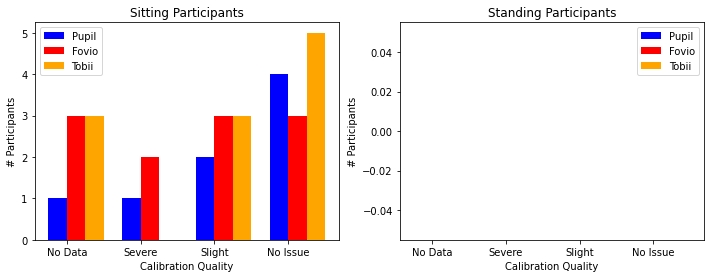

In [3]:
calibration = {0:'No Data', 1:'Severe', 2:'Slight', 3:'No Issue'}

sitting = {
    'Pupil':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0},
    'Fovio':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0},
    'Tobii':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0}
}
standing = {
    'Pupil':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0},
    'Fovio':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0},
    'Tobii':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0}
}


for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(user.position == 'sitting'):
        sitting['Pupil'][calibration[user.pupil]]+=1
    else:
        standing['Pupil'][calibration[user.pupil]]+=1

for id in stationary_users.get_id_list():
    user = stationary_users.get_user(id)
    if(user.position == 'sitting'):
        sitting['Fovio'][calibration[user.fovio]]+=1
        sitting['Tobii'][calibration[user.tobii]]+=1
    else:
        standing['Fovio'][calibration[user.fovio]]+=1
        standing['Tobii'][calibration[user.tobii]]+=1
            
categories = sitting['Pupil'].keys()
r = np.arange(4)
bar_width = .25
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.bar(r, [sitting['Pupil'][x] for x in categories], width=bar_width, color='blue', label="Pupil")
ax1.bar(r+bar_width, [sitting['Fovio'][x] for x in categories], width=bar_width, color='red', label="Fovio")
ax1.bar(r+bar_width*2, [sitting['Tobii'][x] for x in categories], width=bar_width, color='orange', label="Tobii")
ax1.set_xticks(r + bar_width/2,categories)
ax1.set_xlabel('Calibration Quality')
ax1.set_ylabel('# Participants')
ax1.set_title("Sitting Participants")
ax1.legend()

ax2.bar(r, [standing['Pupil'][x] for x in categories], width=bar_width, color='blue', label="Pupil")
ax2.bar(r+bar_width, [standing['Fovio'][x] for x in categories], width=bar_width, color='red', label="Fovio")
ax2.bar(r+bar_width*2, [standing['Tobii'][x] for x in categories], width=bar_width, color='orange', label="Tobii")
ax2.set_xticks(r + bar_width/2,categories)
ax2.set_xlabel('Calibration Quality')
ax2.set_ylabel('# Participants')
ax2.set_title("Standing Participants")
ax2.legend()
plt.show()
plt.tight_layout()
fig.savefig('../data_analysis/calibration.png')
plt.close()

### I.3 Figure Recording Issues

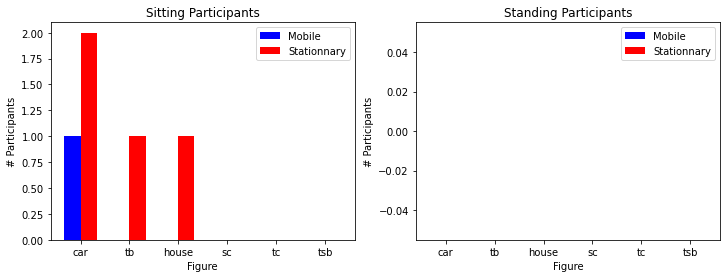

In [4]:
sitting = {
    'Mobile':{'car':0, 'tb':0, 'house':0, 'sc':0, "tc":0, 'tsb':0},
    'Stationnary':{'car':0, 'tb':0, 'house':0, 'sc':0, "tc":0, 'tsb':0}
}
standing = {
    'Mobile':{'car':0, 'tb':0, 'house':0, 'sc':0, "tc":0, 'tsb':0},
    'Stationnary':{'car':0, 'tb':0, 'house':0, 'sc':0, "tc":0, 'tsb':0}
}

for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(not user.has_data()):
        continue
    if(user.position == 'sitting'):
        for figure in sitting['Mobile'].keys():
            if(not user.has_figure_data(figure)):
                sitting['Mobile'][figure] += 1
    else:
        for figure in standing['Mobile'].keys():
            if(not user.has_figure_data(figure)):
                standing['Mobile'][figure] += 1

for id in stationary_users.get_id_list():
    user = stationary_users.get_user(id)
    if(not user.has_data()):
        continue
    if(user.position == 'sitting'):
        for figure in sitting['Stationnary'].keys():
            if(not user.has_figure_data(figure)):
                sitting['Stationnary'][figure] += 1
    else:
        for figure in standing['Stationnary'].keys():
            if(not user.has_figure_data(figure)):
                standing['Stationnary'][figure] += 1
                
categories = sitting['Mobile'].keys()
r = np.arange(6)
bar_width = .33
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.bar(r, [sitting['Mobile'][x] for x in categories], width=bar_width, color='blue', label="Mobile")
ax1.bar(r+bar_width, [sitting['Stationnary'][x] for x in categories], width=bar_width, color='red', label="Stationnary")
ax1.set_xticks(r + bar_width/2,categories)
ax1.set_xlabel('Figure')
ax1.set_ylabel('# Participants')
ax1.set_title("Sitting Participants")
ax1.legend()

ax2.bar(r, [standing['Mobile'][x] for x in categories], width=bar_width, color='blue', label="Mobile")
ax2.bar(r+bar_width, [standing['Stationnary'][x] for x in categories], width=bar_width, color='red', label="Stationnary")
ax2.set_xticks(r + bar_width/2,categories)
ax2.set_xlabel('Figure')
ax2.set_ylabel('# Participants')
ax2.set_title("Standing Participants")
ax2.legend()
plt.show()
plt.tight_layout()
fig.savefig('../data_analysis/figure_recording_issues.png')
plt.close()

### I.4 Specific Issue for Mobile Participants

* Eyes Used
* Screen

## II Event Annotation

blablabla les annotations

### II.1 Action Event

* **Grasp** The moment when the participant's hand comes into contact with the block in order to pick it up.
* **Release** The moment when the participant's hand releases the block with no intention to move it again.

### II.2 Action Event Annotation

* **Correct** Grasp the correct block or release block in the correct position
* **Bad ID**  The ID of the grasped and/or released block was incorrect. However, the shape and color of the block were correct.
* **Error** Grasp a wrong block or release a possibly correct block in a wriing position
* **Correction** Grasp a block released in a wrong position or release a wrong block grasped previously


### II.3 Instruction Event Annotation

* **Start** Assembly starts
* **Next** The participant press the next button
* **Previous** The participant press the previous button
* **No Next Error** The participant grasp a block before press next button
* **Extra Next Error** The participant press the next button before release the block
* **End** Assembly ends